In [1]:
#import libraries 
import pandas as pd
import numpy as np
import os 
import seaborn as sns
import matplotlib.pyplot as plt 
import scipy 
import sklearn 
from sklearn.cluster import KMeans 
from sklearn.preprocessing import StandardScaler
import pylab as pl 

In [2]:
#path to project 
path = r'/Users/libertyonia/Documents/Covid'

In [3]:
#import data as dataframe 
df = pd.read_csv(os.path.join(path,'02 Data','Prepared Data','Ach6_T4_data.csv'))

In [4]:
#check the df 
df.head()

,Unnamed: 0,county_code,county,state,lat,long,date,cases,state_code,deaths,male,female,median_age,population,female_percentage,region,daily_deaths,daily_cases,month,year
0,2,1001.0,Autauga,Alabama,32.539527,-86.644082,2020-01-24,0,AL,0,26874,28326,37.8,55200,51.315217,South,0.0,0.0,1,2020
1,3,1001.0,Autauga,Alabama,32.539527,-86.644082,2020-01-25,0,AL,0,26874,28326,37.8,55200,51.315217,South,0.0,0.0,1,2020
2,4,1001.0,Autauga,Alabama,32.539527,-86.644082,2020-01-26,0,AL,0,26874,28326,37.8,55200,51.315217,South,0.0,0.0,1,2020
3,5,1001.0,Autauga,Alabama,32.539527,-86.644082,2020-01-27,0,AL,0,26874,28326,37.8,55200,51.315217,South,0.0,0.0,1,2020
4,6,1001.0,Autauga,Alabama,32.539527,-86.644082,2020-01-28,0,AL,0,26874,28326,37.8,55200,51.315217,South,0.0,0.0,1,2020


In [5]:
#drop unnamed column 
df = df.drop(columns = ['Unnamed: 0'])

In [6]:
#check the columns 
df.columns.to_list()

['county_code',
 'county',
 'state',
 'lat',
 'long',
 'date',
 'cases',
 'state_code',
 'deaths',
 'male',
 'female',
 'median_age',
 'population',
 'female_percentage',
 'region',
 'daily_deaths',
 'daily_cases',
 'month',
 'year']

In [7]:
#check for duplicates 
df_dups = df[df.duplicated()] 
df_dups
#no duplicates 

,county_code,county,state,lat,long,date,cases,state_code,deaths,male,female,median_age,population,female_percentage,region,daily_deaths,daily_cases,month,year


In [8]:
#check for missing values 
df.isnull().sum()
#no missign values 

county_code          0
county               0
state                0
lat                  0
long                 0
date                 0
cases                0
state_code           0
deaths               0
male                 0
female               0
median_age           0
population           0
female_percentage    0
region               0
daily_deaths         0
daily_cases          0
month                0
year                 0
dtype: int64

In [9]:
#check for mixed datatypes 
for col in df.columns.tolist():
  weird = (df[[col]].applymap(type) != df[[col]].iloc[0].apply(type)).any(axis = 1)
  if len (df[weird]) > 0:
    print (col)
#no mixed data types 

In [10]:
#list column names 
df.columns.to_list()

['county_code',
 'county',
 'state',
 'lat',
 'long',
 'date',
 'cases',
 'state_code',
 'deaths',
 'male',
 'female',
 'median_age',
 'population',
 'female_percentage',
 'region',
 'daily_deaths',
 'daily_cases',
 'month',
 'year']

In [11]:
#aggregate 
agg = {'population':'first',
      'female':'first',
      'male':'first',
      'daily_deaths':sum,
      'daily_cases':sum}

In [12]:
#group data according to county 
df = df.groupby(['state','county']).agg(agg)

In [13]:
df.head()

population  female    male  daily_deaths  daily_cases
state   county                                                        
Alabama Autauga       55200   28326   26874         240.0      19819.0
        Baldwin      208107  106919  101188         735.0      70014.0
        Barbour       25782   12085   13697         105.0       7460.0
        Bibb          22527   10375   12152         117.0       8116.0
        Blount        57645   29211   28434         267.0      18738.0

In [14]:
# Convert the result to a new DataFrame
df = pd.DataFrame(df.reset_index())

In [15]:
#rename columns 
df.columns = ['state','county','population','female','male','total_deaths','total_cases']

In [16]:
#remove categorical columns
df = df.drop(columns = ['state','county'])

In [17]:
#check columns in new dataframe 
df.columns.to_list()

['population', 'female', 'male', 'total_deaths', 'total_cases']

# The new dataframe contains total cases and deaths per county from all dates (2020 - 2023)

# 3. Use the elbow technique as shown in the Jupyter notebook for this Exercise.

In [18]:
#define a range of potential numbers of clusters in the data 
#choosing 1-10 like in the Exercise
num_clusters = range(1,10)
kmeans = [KMeans(n_clusters=i) for i in num_clusters]

In [19]:
#after applying range, then apply k-means algorithm 
score = [kmeans[i].fit(df).score(df) for i in range(len(kmeans))]
#this will output a list of scores 

/Users/libertyonia/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/libertyonia/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/libertyonia/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/libertyonia/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.wa

In [20]:
#list score
score

[-551122804605043.25,
 -265802729328206.38,
 -135719757540725.17,
 -72585524666846.17,
 -45468634335108.11,
 -27965598495175.07,
 -19605470650037.4,
 -13601998608471.295,
 -10509757416817.732]

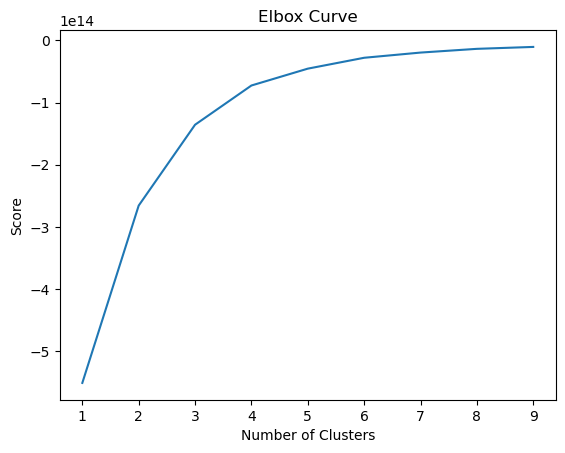

In [21]:
#plot the elbow curve 
pl.plot(num_clusters,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbox Curve')
pl.show()

# 4. Make an informed decision about the number of clusters you’ll use in your k-means algorithm based on the chart.
- Explain why you chose that number in a markdown cell.
- If you run into any problems determining the optimal number of clusters using the elbow technique, reach out to your tutor for suggestions.

I will be choosing the number 4. The values jump rapidly from 1 through 4, then plateaus after 4. This means the optimal count for clusters is 4. 

# 5. Run the k-means algorithm 

In [22]:
#create the k-means object
kmeans = KMeans(n_clusters = 4)

In [23]:
#fit kmeans object to dataframe 
kmeans.fit(df)

/Users/libertyonia/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4)

# 6. Attach a new column to your dataframe with the resulting clusters as shown in the Exercise. This will allow you to create a visualization using your clusters.

In [24]:
#create column in dataframe with values corresponding to clusters 
df['clusters'] = kmeans.fit_predict(df)

/Users/libertyonia/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [25]:
#check the dataframe to see the new column 
df.head()

,population,female,male,total_deaths,total_cases,clusters
0,55200,28326,26874,240.0,19819.0,0
1,208107,106919,101188,735.0,70014.0,0
2,25782,12085,13697,105.0,7460.0,0
3,22527,10375,12152,117.0,8116.0,0
4,57645,29211,28434,267.0,18738.0,0


In [26]:
#count the clusers 
df['clusters'].value_counts()

0    2969
1     153
3      18
2       1
Name: clusters, dtype: int64

# 7. Create a few different visualizations (e.g., scatterplots) using your clustered data. Try plotting different variables against each other to see the results in terms of the clusters.

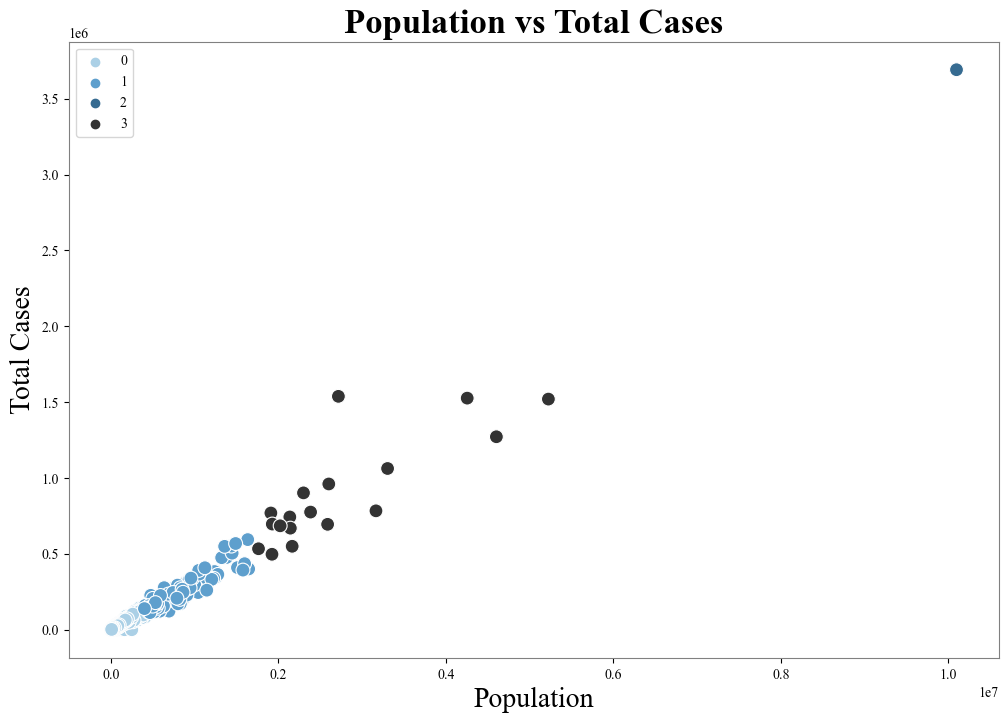

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the font family to Times New Roman for the entire plot
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = 'Times New Roman'

# Define a blue color palette
blue_palette = sns.color_palette("Blues_d", as_cmap=True)

# Create a figure and axes
plt.figure(figsize=(12, 8))
ax = sns.scatterplot(x=df['population'], y=df['total_cases'], hue=kmeans.labels_, s=100, palette=blue_palette)

# Access the spines of the current axes and set the color to gray
ax.spines['top'].set_color('gray')
ax.spines['right'].set_color('gray')
ax.spines['bottom'].set_color('gray')
ax.spines['left'].set_color('gray')

ax.grid(False)  # This removes the grid from the background.
plt.xlabel('Population',fontsize=20)  # Label x-axis.
plt.ylabel('Total Cases',fontsize=20)  # Label y-axis.

# Set the title to be bold
plt.title('Population vs Total Cases', fontsize=25, fontweight='bold')

# Specify the complete file path, including the folder where you want to save the plot
file_path = '/Users/libertyonia/Documents/Covid/scatterplot.png'

# Save the figure to the specified folder
plt.savefig(file_path, dpi=1500, bbox_inches='tight')

# Show the plot (optional)
plt.show()


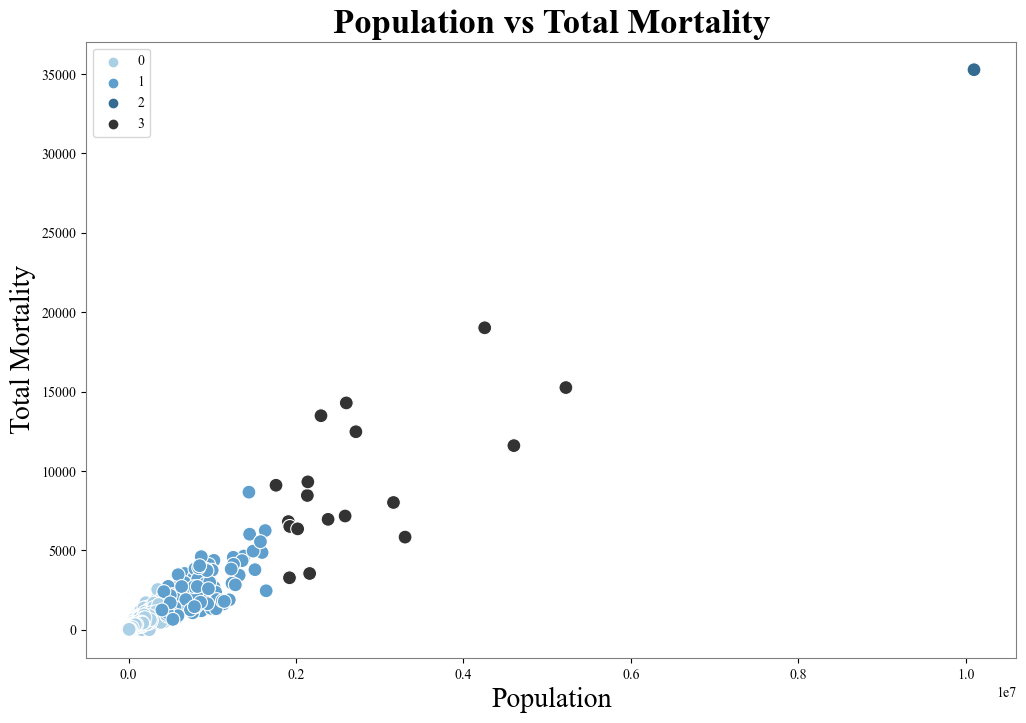

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the font family to Times New Roman for the entire plot
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = 'Times New Roman'

# Define a blue color palette
blue_palette = sns.color_palette("Blues_d", as_cmap=True)

# Create a figure and axes
plt.figure(figsize=(12, 8))
ax = sns.scatterplot(x=df['population'], y=df['total_deaths'], hue=kmeans.labels_, s=100, palette=blue_palette)

# Access the spines of the current axes and set the color to gray
ax.spines['top'].set_color('gray')
ax.spines['right'].set_color('gray')
ax.spines['bottom'].set_color('gray')
ax.spines['left'].set_color('gray')

ax.grid(False)  # This removes the grid from the background.
plt.xlabel('Population',fontsize=20)  # Label x-axis.
plt.ylabel('Total Mortality',fontsize=20)  # Label y-axis.

# Set the title to be bold
plt.title('Population vs Total Mortality', fontsize=25, fontweight='bold')

# Specify the complete file path, including the folder where you want to save the plot
file_path = '/Users/libertyonia/Documents/Covid/scatterplot2.png'

# Save the figure to the specified folder
plt.savefig(file_path, dpi=1500, bbox_inches='tight')

# Show the plot (optional)
plt.show()


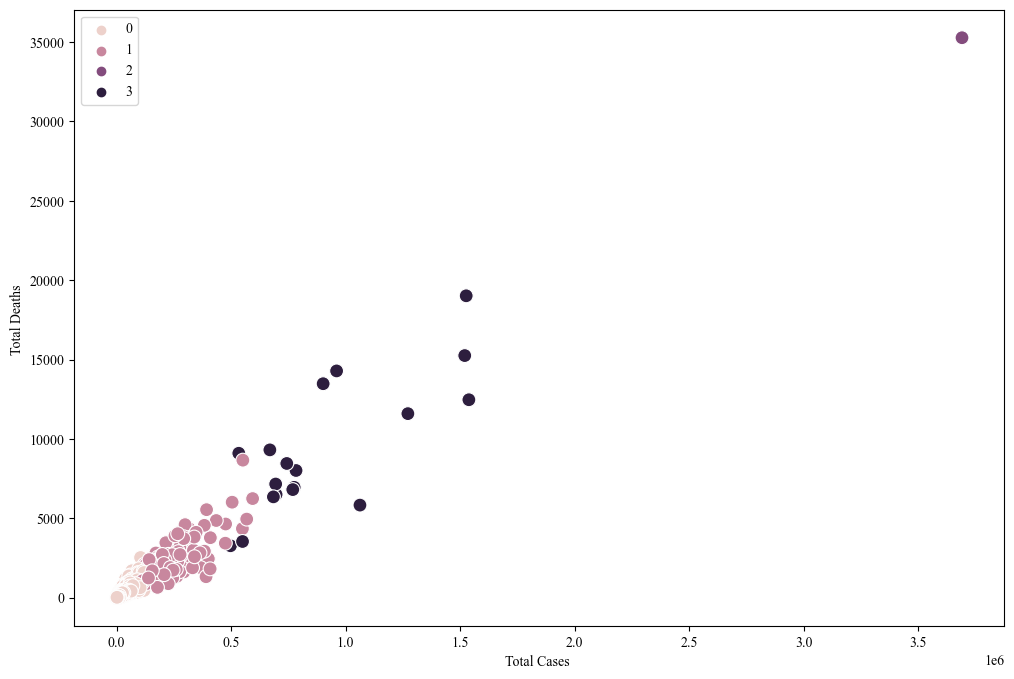

In [29]:
#plot cases vs deaths

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['total_cases'], y=df['total_deaths'], hue=kmeans.labels_, s=100) 

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Total Cases ') # Label x-axis.
plt.ylabel('Total Deaths ') # Label y-axis.
plt.show()

# 8. Discuss how and why the clusters make sense. If they don’t make sense, however, this is also useful insight, as it means you’ll need to explore the data further.
There are 4 distinct clusters that were selected from the elbow technique. The first group (0) are mostly counties with small populations and low cases and deaths. The second group (1) consist of counties with populations less than 2 million with total cases less than 1 million and total deaths less than 10,000. The fourth group (3) consist of counties with populations between 2 to 6 million. This group has 500,000 - 2 million cases and 5,000 - 20,000 deaths. The third group (2) only has one observation. This county has the largest population of around 10,000,000. It has around 3.5 million total cases and 35,000 recorded deaths. This data makes sense as there are a wide range of population sizes in America. Some counties are very small while others can have millions of residents. 

# 9. Calculate the descriptive statistics for your clusters using the groupby() function and discuss your findings.


In [30]:
#create a column that renames the clusters to colors 
df.loc[df['clusters'] == 3, 'cluster'] = 'black'
df.loc[df['clusters'] == 2, 'cluster'] = 'dark purple'
df.loc[df['clusters'] == 1, 'cluster'] = 'purple'
df.loc[df['clusters'] == 0, 'cluster'] = 'pink'

In [31]:
df.groupby('cluster').agg({
    'population':['mean','median'],
    'total_cases':['mean','median'],
    'total_deaths':['mean','median']
})

population               total_cases             total_deaths  \
                     mean      median          mean     median          mean   
cluster                                                                        
black        2.728367e+06   2340899.5  8.989913e+05   772500.5   9300.722222   
dark purple  1.009805e+07  10098052.0  3.691489e+06  3691489.0  35272.000000   
pink         4.991629e+04     23515.0  1.544815e+04     7176.0    188.463456   
purple       7.503818e+05    684017.0  2.309289e+05   209102.0   2328.359477   

                      
              median  
cluster               
black         8235.0  
dark purple  35272.0  
pink           104.0  
purple        2035.0

The pink cluster (0) has low population counties with an average of 50,000 residents. It has an average total cases of around 15,500 and total deaths of around 200. 

The purple cluster (1) has middle population sized counties with an average of around 750,000 residents. It has an average total cases of around 230,000 and 2,500 deaths. 

The black cluster (3) has large populated counties. The average population is 2.7 million. The average total cases is around 920,000 cases and the average total deaths is 9,300. 

The dark purple cluster (2) contains only one county. The county has a population of around 10,000,000 residents. The total cases is around 3.5 million and the total deaths is 35,272. 

Interestingly, each cluster is ~10X times greater/lower than its neighboring cluster. For instance, the pink cluster has a total population that is less than 10x of the purple cluster population. 


# 10. Propose what these results could be useful for in future steps of an analytics pipeline.
Rather than there being three distinct population sizes (example: small, medium, and large), there are 4 distinct population sizes per county. It may be interesting to further analysis on states rather than counties. Also, it would be interesting to creating a scatter plot like those above, but the color coordination comes from U.S.A regions (South, Midwest, Northeast, West). This may give insight if regions follow the cluster pattern. 

In [32]:
df

,population,female,male,total_deaths,total_cases,clusters,cluster
0,55200,28326,26874,240.0,19819.0,0,pink
1,208107,106919,101188,735.0,70014.0,0,pink
2,25782,12085,13697,105.0,7460.0,0,pink
3,22527,10375,12152,117.0,8116.0,0,pink
4,57645,29211,28434,267.0,18738.0,0,pink
...,...,...,...,...,...,...,...
3136,44117,21235,22882,139.0,12497.0,0,pink
3137,23059,11148,11911,17.0,12157.0,0,pink
3138,20609,10104,10505,43.0,6444.0,0,pink
3139,8129,3992,4137,50.0,2818.0,0,pink


In [33]:
df.to_csv(os.path.join(path,'02 Data','Prepared Data','Cluster.csv'))